# TUGAS 3 K-Means Cluster 2,3 dan 4

In [1]:
%pip install pymysql
%pip install psycopg2


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Bagian Awal: Ambil dan Gabungkan Data



Kode dibawah menghubungkan ke dua database berbeda: PostgreSQL dan MySQL, mengambil data dari tabel `iris_postgresql` dan `irismysql`, lalu menggabungkan keduanya berdasarkan kolom `id` dan `class` menggunakan metode join `inner`. Fungsi `get_pg_data()` menghubungkan ke PostgreSQL menggunakan `psycopg2`, mengambil semua data dengan perintah SQL `SELECT * FROM iris_postgresql`, dan mengubahnya menjadi DataFrame Pandas. Fungsi `get_mysql_data()` melakukan hal yang sama untuk MySQL menggunakan `pymysql`. Hasil dari kedua fungsi ini adalah dua DataFrame (`df_postgresql` dan `df_mysql`) yang kemudian digabungkan dengan `pd.merge()` berdasarkan kolom yang sama di kedua tabel. Hasil penggabungan ini disimpan dalam `df_merged` dan ditampilkan di konsol tanpa menampilkan indeks baris menggunakan `to_string(index=False)`.

In [3]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-386e5cc2-pendatatugas.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_7tnhSuMHnji20iEQMHm",
        database="defaultdb",
        port=18544
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()

    

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-1d4251e3-pendatatugas.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_pyuM76LsQluDuryhiI2",
        database="defaultdb",
        port=18544
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa          15.0         20.0          46.0         31.0
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa          16.0         20.0          48.0         34.0
 13     Iris-setosa           1.4     

## Preprocessing dan Reduksi Dimensi


Kode dibawah melakukan proses **normalisasi** dan **reduksi dimensi** terhadap data hasil penggabungan PostgreSQL dan MySQL (`df_merged`). Pertama, kolom non-numerik `id` dan `class` dihapus dari DataFrame menggunakan `.drop()`, sehingga hanya kolom numerik yang akan digunakan untuk analisis. Selanjutnya, data dinormalisasi menggunakan `StandardScaler()` dari Scikit-Learn untuk memastikan setiap fitur memiliki rata-rata 0 dan standar deviasi 1, menghasilkan `scaled_features`. Kemudian, proses **reduksi dimensi** dilakukan menggunakan **Principal Component Analysis (PCA)** dengan mengonfigurasi jumlah komponen (`n_components=2`) untuk mereduksi data ke dalam dua dimensi utama. Hasil reduksi ini disimpan dalam variabel `reduced_features`, yang dapat digunakan untuk visualisasi lebih lanjut atau analisis lanjutan.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)


## Clustering + Visualisasi (2 Cluster)

Kode dibawah melakukan **clustering** menggunakan algoritma **KMeans** pada data hasil normalisasi (`scaled_features`). Pertama, objek `KMeans` dibuat dengan parameter `n_clusters=2`, menandakan bahwa data akan dikelompokkan menjadi 2 klaster, serta `random_state=42` untuk hasil yang konsisten dan `n_init=10` yang menentukan jumlah inisialisasi ulang untuk hasil terbaik. Data kemudian dikelompokkan menggunakan `.fit_predict()`, menghasilkan label klaster yang disimpan dalam `labels_2`.

Selanjutnya, dua metrik evaluasi dihitung:

1. **Inertia**: Jumlah kuadrat jarak dari tiap titik ke pusat klasternya, digunakan untuk mengukur kepadatan klaster.
2. **Silhouette Score**: Ukuran seberapa baik setiap titik data berada di dalam klasternya, bernilai antara -1 dan 1 (semakin tinggi, semakin baik pengelompokan).

Hasil evaluasi ditampilkan di konsol. Terakhir, data divisualisasikan dalam dua dimensi hasil reduksi PCA (`reduced_features`), diwarnai berdasarkan label klaster (`c=labels_2`) dengan skema warna 'viridis'. Grafik diberi label sumbu, judul, dan grid untuk memudahkan interpretasi.


[2 Clusters] Inertia: 92.38, Silhouette Score: 0.9092


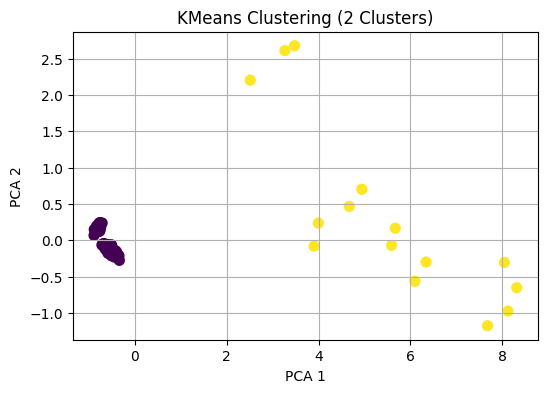

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.2f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


## Clustering + Visualisasi (3 Cluster)


Kode dibawah melakukan **clustering** menggunakan algoritma **KMeans** dengan jumlah klaster yang berbeda, yaitu 3 klaster. Prosesnya hampir sama dengan kode sebelumnya yang menggunakan 2 klaster. Berikut adalah langkah-langkah yang dilakukan:

1. **Inisialisasi KMeans**: Objek `KMeans` dibuat dengan parameter `n_clusters=3` untuk membagi data menjadi 3 kelompok, `random_state=42` untuk konsistensi hasil, dan `n_init=10` untuk menjalankan algoritma beberapa kali dan memilih hasil terbaik.

2. **Proses Clustering**: Metode `.fit_predict()` dijalankan pada data hasil normalisasi (`scaled_features`) untuk menghasilkan label klaster yang disimpan dalam `labels_3`.

3. **Evaluasi Klaster**:

   * **Inertia**: Mengukur total jarak kuadrat antara titik data dan pusat klasternya, yang menggambarkan kepadatan masing-masing klaster.
   * **Silhouette Score**: Mengukur kualitas klaster dengan rentang nilai dari -1 (buruk) hingga 1 (baik), semakin tinggi skor, semakin baik pengelompokan.

4. **Visualisasi**:

   * Data hasil reduksi dimensi PCA (`reduced_features`) diplot dalam dua dimensi.
   * Setiap titik diwarnai sesuai label klasternya (`c=labels_3`) menggunakan skema warna 'viridis'.
   * Grafik dilengkapi dengan judul, label sumbu, dan grid untuk memudahkan interpretasi.

Dengan menambah klaster dari 2 ke 3, kita dapat mengevaluasi apakah distribusi data lebih terstruktur dan apakah nilai *Silhouette Score* meningkat, menandakan klaster yang lebih baik.

[3 Clusters] Inertia: 42.29, Silhouette Score: 0.8962


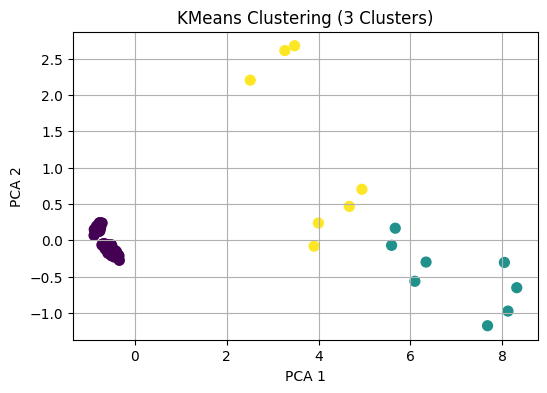

In [6]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.2f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


## Clustering + Visualisasi (4 Cluster)



Kode dibawah memperluas proses **KMeans Clustering** dengan menambah jumlah klaster menjadi **4**. Pertama, objek `KMeans` diinisialisasi dengan parameter `n_clusters=4`, `random_state=42`, dan `n_init=10`, lalu diterapkan pada data yang telah dinormalisasi (`scaled_features`) menggunakan `.fit_predict()`, menghasilkan label klaster yang disimpan dalam `labels_4`. Selanjutnya, dilakukan evaluasi menggunakan dua metrik utama: **Inertia**, yang mengukur total jarak kuadrat dari tiap titik ke pusat klasternya (semakin kecil, semakin baik), dan **Silhouette Score**, yang menilai kesesuaian data dalam klaster (semakin tinggi, semakin baik). Terakhir, hasil klaster divisualisasikan dalam dua dimensi hasil reduksi PCA (`reduced_features`), diwarnai sesuai label klaster, dengan skema warna 'viridis', lengkap dengan judul, label sumbu, dan grid untuk mempermudah interpretasi.


[4 Clusters] Inertia: 26.83, Silhouette Score: 0.8935


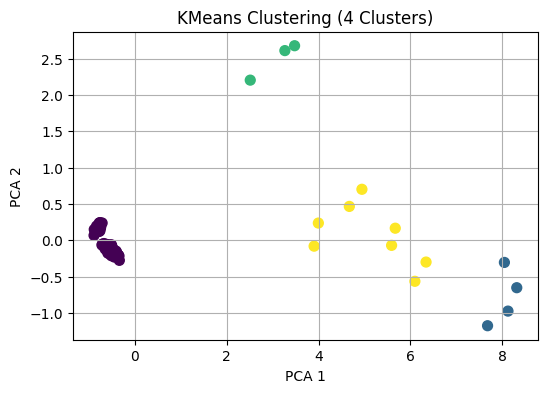

In [7]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.2f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()
